<a href="https://colab.research.google.com/github/ecloguehwang/schoolconsulting/blob/main/ai%EC%9E%85%EA%B2%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법A: 이 코드실행하고 런타임(runtime) 다시 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
#pandas, openpyxl 라이브러리 부르기
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt


#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False



##  데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}sehyun_2025_habbul.xlsx')


# 첫 5줄을 봅니다.
df.tail(2)

In [ ]:
#1. 진학자료A: 내신, 대학1, 모집단위1 순

import pandas as pd
from tabulate import tabulate

##  데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}sehyun_2025_habbul.xlsx')


# '최종' 열의 값이 '합'인 행들만 선택
df_pass = df[df['최종'] == '합']


# '전과목' 열을 기준으로 오름차순으로 정렬
df_pass = df_pass.sort_values(by='전과목', ascending=True)


# 전과목 내신등급을 소수점 둘째자리에서 반올림
df_pass['전과목'] = df_pass['전과목'].round(1)


# '전과목' 값을 기준으로 그룹화하고, 각 그룹 내에서 대학과 모집단위를 리스트로 변환
grouped = df_pass.groupby('전과목').agg({'대학': list, '모집단위': list})


# 대학과 모집단위의 리스트를 개별 열로 확장
def expand_columns(row, col_name, max_cols):
    return [row[col_name][i] if i < len(row[col_name]) else None for i in range(max_cols)]


# 가장 많은 대학과 모집단위가 나타난 횟수 계산
max_length = max(grouped['대학'].apply(len))


# 새로운 열 이름 생성 (예: 대학1, 대학2, ...)
new_col_names = []
for i in range(max_length):
    new_col_names.append(f'대학{i+1}')
    new_col_names.append(f'모집단위{i+1}')

# 새로운 데이터프레임 생성
expanded_df = pd.DataFrame()

# 확장된 열을 새 데이터프레임에 추가
for i in range(max_length):
    expanded_df[f'대학{i+1}'] = grouped.apply(lambda row: expand_columns(row, '대학', max_length)[i], axis=1)
    expanded_df[f'모집단위{i+1}'] = grouped.apply(lambda row: expand_columns(row, '모집단위', max_length)[i], axis=1)


# 데이터프레임 인덱스 초기화 및 '전과목' 열 추가
expanded_df = expanded_df.reset_index()

# '전과목' 열의 이름을 '내신'으로 변경
expanded_df.rename(columns={'전과목': '내신'}, inplace=True)


# 선택한 열 순서대로 데이터프레임 재구성
columns_to_show = ['내신'] + new_col_names
final_df = expanded_df[columns_to_show]


# tabulate를 사용하여 결과 출력
print(tabulate(final_df.head(2), headers='keys', tablefmt='plain', showindex=False))


# 결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/consulting/'
final_df.to_excel(excel_writer=f'{path}통상적인합격자명단A_2025_SE고.xlsx', engine='openpyxl')

  내신  대학1     모집단위1       대학2    모집단위2    대학3    모집단위3    대학4    모집단위4    대학5    모집단위5    대학6    모집단위6    대학7    모집단위7    대학8    모집단위8
   1.4  성균관대  전자전기공학부
   2    이화여대  간호학부(자연)


In [ ]:
#2. 진학자료B: 내신, 전형분류, 대학, 모집단위 순

import pandas as pd
from tabulate import tabulate


# '최종' 열의 값이 '합'인 행들만 선택
df_pass = df[df['최종'] == '합']


# '전과목' 열을 기준으로 오름차순으로 정렬
df_pass = df_pass.sort_values(by='전과목', ascending=True)


# 전과목 내신등급을 소수점 둘째자리에서 반올림
df_pass['전과목'] = df_pass['전과목'].round(1)


# '전과목' 값을 기준으로 그룹화하고, 각 그룹 내에서 대학, 모집단위, 전형분류를 리스트로 변환
grouped = df_pass.groupby('전과목').agg({'대학': list, '모집단위': list, '전형분류': list})

# 대학, 모집단위, 전형분류의 리스트를 개별 열로 확장
def expand_columns(row, col_name, max_cols):
    return [row[col_name][i] if i < len(row[col_name]) else None for i in range(max_cols)]

# 가장 많은 대학과 모집단위가 나타난 횟수 계산
max_length = max(grouped['대학'].apply(len))

# 새로운 열 이름 생성 (예: 대학1, 대학2, ...)
new_col_names = []
for i in range(max_length):
    new_col_names.append(f'전형분류{i+1}')
    new_col_names.append(f'대학{i+1}')
    new_col_names.append(f'모집단위{i+1}')

# 새로운 데이터프레임 생성
expanded_df = pd.DataFrame()

# 확장된 열을 새 데이터프레임에 추가
for i in range(max_length):
    expanded_df[f'전형분류{i+1}'] = grouped.apply(lambda row: expand_columns(row, '전형분류', max_length)[i], axis=1)
    expanded_df[f'대학{i+1}'] = grouped.apply(lambda row: expand_columns(row, '대학', max_length)[i], axis=1)
    expanded_df[f'모집단위{i+1}'] = grouped.apply(lambda row: expand_columns(row, '모집단위', max_length)[i], axis=1)

# 데이터프레임 인덱스 초기화 및 '전과목' 열 추가
expanded_df = expanded_df.reset_index()

# '전과목' 열의 이름을 '내신'으로 변경
expanded_df.rename(columns={'전과목': '내신'}, inplace=True)

# 선택한 열 순서대로 데이터프레임 재구성
columns_to_show = ['내신'] + new_col_names  # 이제 열 순서가 전형분류1, 대학1, 모집단위1, 전형분류2, 대학2, 모집단위2 순서가 되어야 함
final_df = expanded_df[columns_to_show]



# tabulate를 사용하여 결과 출력
print(tabulate(final_df.head(2), headers='keys', tablefmt='plain', showindex=False))

# 결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/eunpyeong/result_excel/'
final_df.to_excel(excel_writer=f'{path}통상적인합격자명단B_2025_SE고_전형분류추가.xlsx', engine='openpyxl')

  내신  전형분류1    대학1     모집단위1       전형분류2    대학2    모집단위2    전형분류3    대학3    모집단위3    전형분류4    대학4    모집단위4    전형분류5    대학5    모집단위5    전형분류6    대학6    모집단위6    전형분류7    대학7    모집단위7    전형분류8    대학8    모집단위8
   1.4  수능         성균관대  전자전기공학부
   2    종합         이화여대  간호학부(자연)


In [4]:
#3. 게시용 자료: 4년제대 합격자 명단B: '지역', '대학', '모집단위', '지원시기'

import pandas as pd
from tabulate import tabulate

# 최종 열의 값이 '가나다'일 때 '정시'로 변경
df.loc[df['최종'] == '가나다', '최종'] = '정시'

# 게시용 4년제대 합격자 명단A: '지역', '대학', '모집단위', '지원시기'

# uni4 DataFrame 생성
uni4 = df[(df['최종'] == '합') & ~(df['대학'].str.contains("대학교"))][['지역', '대학', '모집단위', '지원시기']]


# '지원시기' 열의 값이 '가', '나', '다'일 경우 '정시'로 변경
uni4.loc[uni4['지원시기'].isin(['가', '나', '다']), '지원시기'] = '정시'



#대구카톨릭대 국어교육과 합격자 제외
uni4 = uni4[~((uni4['대학'] == '대구가톨릭대') & (uni4['모집단위'] == '국어교육과'))].copy()


# 결과를 출력할 순서대로 정렬
output_order = ['대구가톨릭대', '서울대',  '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대', '숙명여대',
                '국민대', '숭실대', '세종대', '서울과기대', '광운대', '명지대', '상명대', '가톨릭대(성심)', '가천대(글로벌)',
                '한국예술종합학교', '공군사관학교', '한성대', '서경대', '삼육대',  '성신여대', '서울여대', '덕성여대', '아주대', '인하대', '한양대(에리카)']



uni4 = uni4.sort_values(by=['대학', '모집단위'], key=lambda x: x.map({v: i for i, v in enumerate(output_order)}))

# 합격자수
print("2025SE고 4년제대 합격자수는 %d건입니다.(중복합격 포함)" % len(uni4))
print("***************************************************************************")

# tabulate를 사용하여 결과 출력
print(tabulate(uni4.head(2), headers='keys', tablefmt='plain', showindex=False))

# 데이터프레임을 엑셀로 저장
#path = '/content/drive/MyDrive/python/sehyun/result_habbul/'
#uni4.to_excel(excel_writer=f'{path}게시용합격자_2025_세현고_uniorder_board1.xlsx', index=False)


2025SE고 4년제대 합격자수는 78건입니다.(중복합격 포함)
***************************************************************************
지역    대학      모집단위        지원시기
서울    고려대    지리교육과      정시(가)
경기    성균관대  전자전기공학부  정시(나)


In [5]:
#4. 게시용 자료: 4년제대 주요대합격자 명단: '지역', '대학', '모집단위', '지원시기', '전형분류'

from tabulate import tabulate


# 지역, 최종, ace대학 제외
uni4 = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교"))]



# '지원시기' 열의 값이 '가', '나', '다'일 경우 '정시'로 변경
uni4.loc[uni4['지원시기'].isin(['가', '나', '다']), '지원시기'] = '정시'


# 필요한 변수(열)만 불러옴
uni4 = uni4[['지역', '대학', '모집단위', '지원시기', '전형분류']]



#대구카톨릭대 국어교육과 합격자 제외
uni4 = uni4[~((uni4['대학'] == '대구가톨릭대') & (uni4['모집단위'] == '국어교육과'))].copy()



# 결과를 출력할 순서대로 정렬
output_order = ['서울대',  '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대', '숙명여대',
                '국민대', '숭실대', '세종대', '서울과기대', '광운대', '명지대', '상명대', '가톨릭대(성심)', '가천대(글로벌)',
                '한국예술종합학교', '공군사관학교', '한성대', '서경대', '삼육대',  '성신여대', '서울여대', '덕성여대', '아주대', '인하대', '한양대(에리카)']


uni4 = uni4.sort_values(by=['대학', '모집단위'], key=lambda x: x.map({v: i for i, v in enumerate(output_order)}))



# 합격자수
print("2025SE고 4년제대 합격자수는 %d건입니다.(중복합격 포함)" % len(uni4))
print("**********************************************************************")


# tabulate를 사용하여 결과 출력
print(tabulate(uni4.head(2), headers='keys', tablefmt='plain', showindex=False))


# 데이터 프레임으로 전환
uni4_p = pd.DataFrame(uni4)

# 결과를 엑셀로 저장
#path = '/content/drive/MyDrive/python/sehyun/result_habbul/'
#uni4_p.to_excel(excel_writer=f'{path}pass_2025_세현고_uniorder_board2.xlsx')

2025SE고 4년제대 합격자수는 78건입니다.(중복합격 포함)
**********************************************************************
지역    대학      모집단위        지원시기    전형분류
서울    고려대    지리교육과      정시(가)    수능
경기    성균관대  전자전기공학부  정시(나)    수능


In [ ]:
#5.수시, 정시별 서울주요대 합격자수

import pandas as pd
import matplotlib.pyplot as plt


#표시할 대학리스트
uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대',
       '숙명여대', '국민대', '숭실대', '세종대', '서울과기대', '광운대', '명지대', '상명대', '가톨릭대(성심)', '가천대(글로벌)']


# 데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}sehyun_2025_habbul.xlsx')


# '지원시기'열의 값 변경: 가,나
df['지원시기'] = df['지원시기'].replace({'가': '정시', '나': '정시', '다': '정시',
                                       '수시1차': '수시', '수시2차': '수시'})

# 빈 리스트
uni_new = []
num_su = []
num_je = []


# 리스트에 새로운 대학리스트와, 수시합격자, 정시합격자를 담기
for u in uni:
    df_u = df[(df.대학 == u) & (df.최종 == '합')]
    df_u = df_u[['지원시기', '학번', '대학', '최종']]

    num_su_u = len(df_u[df_u['지원시기'] == '수시'])
    num_je_u = len(df_u[df_u['지원시기'] == '정시'])


    if num_su_u >= 1 or num_je_u >= 1:  # '지원시기'열의 값이 1 이상일 때만 값을 표시
        uni_new.append(u)
        num_su.append(num_su_u)
        num_je.append(num_je_u)

        print(u, "합격자수 - 수시:", str(num_su_u) + "명,", "정시:", str(num_je_u) + "명")
        print("-----------------------------------------\n")

서울시립대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

이화여대 합격자수 - 수시: 2명, 정시: 0명
-----------------------------------------

홍익대 합격자수 - 수시: 3명, 정시: 0명
-----------------------------------------

국민대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

세종대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

상명대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

가톨릭대(성심) 합격자수 - 수시: 2명, 정시: 0명
-----------------------------------------



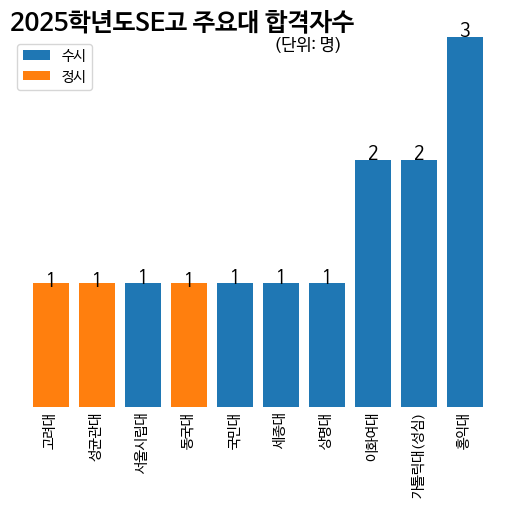

In [ ]:
#6. 서울주요대 합격자수 세로 막대그래프

import pandas as pd
import matplotlib.pyplot as plt


#표시할 대학리스트
uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대',
       '숙명여대', '국민대', '숭실대', '세종대', '서울과기대', '광운대', '명지대', '상명대', '가톨릭대(성심)', '가천대(글로벌)']


# 데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}sehyun_2025_habbul.xlsx')


# '지원시기'열의 값 변경: 가,나
df['지원시기'] = df['지원시기'].replace({'정시(가)': '정시', '정시(나)': '정시', '정시(다)': '정시', '정시1차': '정시',
                                 '수시1차': '수시', '수시2차': '수시'})

# 빈 리스트
uni_new = []
num_su = []
num_je = []


# 리스트에 새로운 대학리스트와, 수시합격자, 정시합격자를 담기
for u in uni:
    df_u = df[(df.대학 == u) & (df.최종 == '합')]
    df_u = df_u[~((df_u['대학'] == '대구가톨릭대') & (df_u['모집단위'] == '국어교육과'))]
    df_u = df_u[~((df_u['대학'] == '동덕여대') & (df_u['모집단위'] == '식품영양학전공'))]

    df_u = df_u[['지원시기', '학번', '대학', '최종']]

    num_su_u = len(df_u[df_u['지원시기'] == '수시'])
    num_je_u = len(df_u[df_u['지원시기'] == '정시'])


    if num_su_u >= 1 or num_je_u >= 1:  # '지원시기'열의 값이 1 이상일 때만 값을 표시
        uni_new.append(u)
        num_su.append(num_su_u)
        num_je.append(num_je_u)

        #print(u, "합격자수 - 수시:", str(num_su_u) + "명,", "정시:", str(num_je_u) + "명")
        #print("-----------------------------------------\n")


# 지원시기가 1 이상인 데이터만 사용
num_su = [su for su, je in zip(num_su, num_je) if su >= 1 or je >= 1]
num_je = [je for su, je in zip(num_su, num_je) if su >= 1 or je >= 1]
uni_new = [uni for uni, su, je in zip(uni_new, num_su, num_je) if su >= 1 or je >= 1]


if len(uni_new) > 0:
    # sort the data by the total number of admissions (sum of num_su and num_je)
    data = sorted(zip(uni_new, num_su, num_je), key=lambda x: x[1]+x[2], reverse=False)
    uni_new = [x[0] for x in data]
    num_su = [x[1] for x in data]
    num_je = [x[2] for x in data]

    # plot the bar graph
    fig, ax = plt.subplots()
    ax.bar(uni_new, num_su, label='수시')
    ax.bar(uni_new, num_je, bottom=num_su, label='정시')


    # add value labels
    for i, (su, je) in enumerate(zip(num_su, num_je)):
        if su >= 1:
            ax.text(i, su+0.05, su, ha='center', va='center', fontsize=13)
        if je >= 1:
            ax.text(i, su + je+0.02, je, ha='center', va='center', fontsize=13)



    # Add '의예과' label for '가천대(메디컬)'
    for i, (uni, su, je) in enumerate(zip(uni_new, num_su, num_je)):
        if uni == '가천대(메디컬)' and '의예과' not in uni_new:
            ax.text(i+0.08, su - 0.5, '의 대', ha='center', va='center', fontsize=10, color='white', rotation=90)



    # Add '의예과' label for '인하대'
    for i, (uni, su, je) in enumerate(zip(uni_new, num_su, num_je)):
        if uni == '인하대' and '의예과' not in uni_new:
            ax.text(i+0.08, su - 0.5, '의 대', ha='center', va='center', fontsize=10, color='white', rotation=90)



    # Add '의예과' label for '순천향대'
    for i, (uni, su, je) in enumerate(zip(uni_new, num_su, num_je)):
        if uni == '순천향대' and '의예과' not in uni_new:
            ax.text(i+0.08, su - 0.5, '의 대', ha='center', va='center', fontsize=10, color='white', rotation=90)


    # Add '의예과' label for '충북대'
    for i, (uni, su, je) in enumerate(zip(uni_new, num_su, num_je)):
        if uni == '충북대' and '의예과' not in uni_new:
            ax.text(i+0.08, su - 0.5, '의 대', ha='center', va='center', fontsize=10, color='white', rotation=90)


    # Add '의예과' label for '충북대'
    for i, (uni, su, je) in enumerate(zip(uni_new, num_su, num_je)):
        if uni == '충북대' and '의예과' not in uni_new:
            ax.text(i+0.08, su - 0.5, '의 대', ha='center', va='center', fontsize=10, color='white', rotation=90)



    # Add '육사' label for '육사'
    #for i, (uni, su, je) in enumerate(zip(uni_new, num_su, num_je)):
        #if uni == '육군사관학교' and '육군사관학교(인문)(남)' not in uni_new:
            #ax.text(i+0.08, su - 0.5, '육사', ha='center', va='center', fontsize=10, color='white', rotation=90)

    # 범례
    ax.legend()

    # 그래프 제목
    ax.set_title('2025학년도SE고 주요대 합격자수', fontsize=18, fontweight='bold', loc='left')

    # 그래프 부제목
    ax.text(0.6, 1.00, '(단위: 명)', ha='center', va='top', transform=ax.transAxes, fontsize=12)


    # X축 눈금(ticks) 제거
    ax.tick_params(axis='x', which='both', length=0)


    plt.xticks(rotation= 90)  # x축 45도 회전
    plt.box(False)  # 테두리 박스 제거
    plt.yticks([])  # y축 제거

    path1 = '/content/drive/MyDrive/python/sehyun/result_png/'
    path2 = '/content/drive/MyDrive/python/sehyun/result_pdf/'


    plt.savefig(f'{path1}pass_2025_세현고_합격자막대그래프_test.png') #png로 저장
    plt.savefig(f'{path2}pass_2025_세현고_합격자막대그래프_test.pdf') #pdf로 저장
    plt.show()
else:
    print("아쉽게도 그래프를 그릴 합격자가 없습니다.")

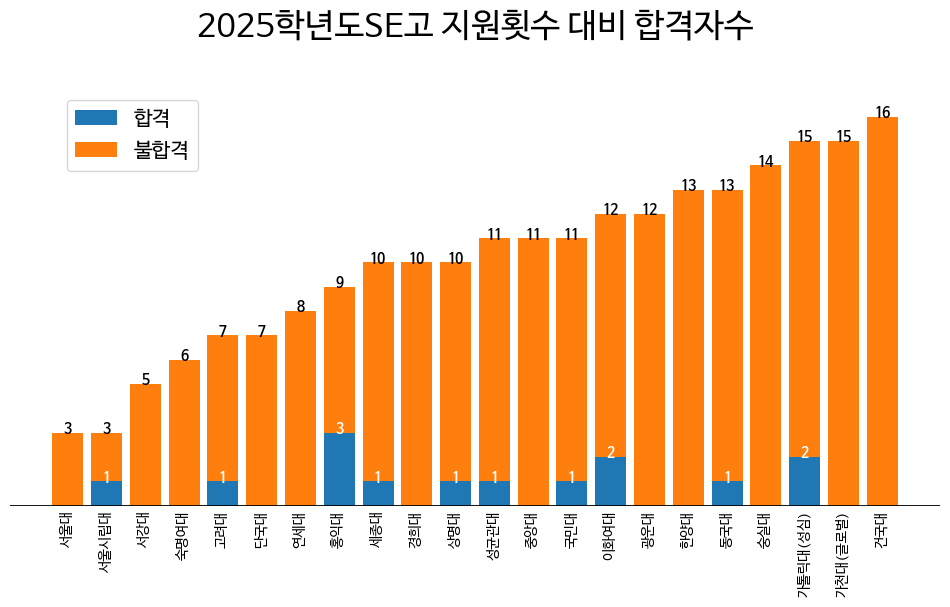

In [ ]:
#7. 지원횟수 대비 서울 주요대 합불 세로 막대그래프

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}sehyun_2025_habbul.xlsx')

uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대',
       '건국대', '동국대', '홍익대','숙명여대', '국민대', '숭실대', '세종대', '단국대', '광운대', '명지대', '상명대', '가천대(글로벌)', '가톨릭대(성심)']


# create a new DataFrame containing the number of applications and acceptance for each university and sort it in ascending order by number of applications
num_applications = []
num_acceptance = []
for u in uni:
    uni_admissions = df[df['대학'] == u]
    num_app = len(uni_admissions)
    num_acc = len(uni_admissions[uni_admissions['최종'] == '합'])
    num_applications.append(num_app)
    num_acceptance.append(num_acc)

admission_df = pd.DataFrame({'대학': uni, '지원건수': num_applications, '합격건수': num_acceptance})


# 빈도가 0인 경우 해당 label을 x축 label에서 제거
admission_df = admission_df[admission_df['지원건수'] != 0]

# 그래프를 오름차순으로 정렬하기
admission_df = admission_df.sort_values('지원건수')


# create a vertical stacked bar plot of the number of applications and acceptance
plt.figure(figsize=(12,6))
plt.bar(x='대학', height='합격건수', data=admission_df, bottom=0, label='합격')
plt.bar(x='대학', height= admission_df['지원건수']- admission_df['합격건수'], data=admission_df, bottom=admission_df['합격건수'],
        label='불합격')


plt.xticks(rotation=90, ha='center')
plt.title('2025학년도SE고 지원횟수 대비 합격자수', fontsize=24)

# add labels on top of the bars for the number of accepted applicants
for i, v in enumerate(admission_df['합격건수']):
    if v > 0:
        plt.text(i, v, str(v), color='white', ha='center', fontweight='bold')  #글자색 white
        #plt.text(i, v, str(v), color='black', ha='center', fontweight='bold') #글자색 black

for a, b in enumerate(admission_df['지원건수']):
    if b > 0:
        plt.text(a, b, str(b), color='black', ha='center', fontweight='bold')

# modify the y-tick range to start from 1 instead of 0
plt.yticks(np.arange(1, 21, 2))

# y축 제거
plt.yticks([])

# remove ticks and spines from the y-axis and top x-axis
plt.tick_params(axis='y', which='both', length=0)  # remove ticks from y-axis
#plt.tick_params(axis='x', which='both', length=0, top=False)  # remove ticks from top x-axis
plt.gca().spines['top'].set_visible(False)  # remove spine from top x-axis
plt.gca().spines['right'].set_visible(False)  # remove spine from right y-axis
plt.gca().spines['left'].set_visible(False)  # remove spine from right y-axis
plt.gca().spines['bottom'].set_visible(False)  # remove spine from right y-axis

# create a horizontal line on the x-axis
plt.axhline(y=0, color='black', linewidth=2)

# move the legend to the right and adjust its position
plt.legend(fontsize = 15, loc='upper left', bbox_to_anchor=(0.05, 0.9))

# X축 눈금(ticks) 제거
plt.tick_params(axis='x', which='both', length=0)
# adjust the spacing of the plot to make room for the legend
#plt.subplots_adjust(right=0.75)

#저장
path1 = '/content/drive/MyDrive/python/sehyun/result_png/'
path2 = '/content/drive/MyDrive/python/sehyun/result_pdf/'


#plt.savefig(f'{path1}pass_2025_세현고_지원건수대비합격.png')
#plt.savefig(f'{path2}pass_2025_세현고_지원건수대비합격.pdf')

plt.show()

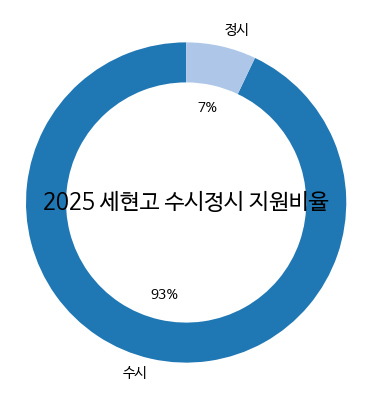

In [ ]:
#8. 수시정시 지원률 도넛차트 그래프

import pandas as pd
import matplotlib.pyplot as plt


##  데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}sehyun_2025_habbul.xlsx')



# 조건에 따라 '지원시기'열의 값 변경
df['지원시기'] = df['지원시기'].replace({'정시(가)': '정시', '정시(나)': '정시', '정시(다)': '정시', '정시1차':'정시',
                                       '수시1차': '수시', '수시2차': '수시', '수시': '수시'})


# '지원시기'별 비율 계산
지원시기_비율 = (df['지원시기'].value_counts(normalize=True) * 100).astype(int)  # 정수로 변환 후 퍼센트로 변환
labels = 지원시기_비율.index


# '최종' 열의 값이 '합'인 경우는 '합격', '불'인 경우는 '불합격'으로 변경
df['최종'] = df['최종'].apply(lambda x: '합격' if x == '합' else '불합격')


# '합격'과 '불합격'별 비율 계산
최종_비율 = (df['최종'].value_counts(normalize=True) * 100).astype(int)  # 정수로 변환 후 퍼센트로 변환


# '지원시기' 도넛 차트
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(지원시기_비율, labels=labels, autopct='%1.0f%%', startangle=90, colors=plt.cm.tab20.colors, wedgeprops=dict(width=0.25))




# 제목 추가
plt.text(0, 0, '2025 세현고 수시정시 지원비율', fontsize=16, ha='center', va='center')
plt.axis('equal')  # 동그랗게 만들기


path = '/content/drive/MyDrive/python/sehyun/result_habbul/'
#plt.savefig(f'{path}pass_2025_세현고_수시정시지원비율.png')
#plt.savefig(f'{path}pass_2025_세현고_수시정시지원비율.pdf')
plt.show()

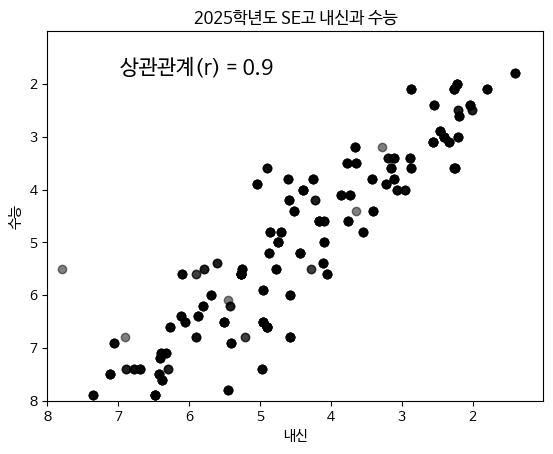

In [ ]:
#9. 내신과 수능의 상관도: 산포도

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Drop rows with any NaN values in '전과목' or '등급수능' columns
df = df.dropna(subset=['전과목', '등급수능'])


# Extract '전과목' and '등급수능' columns
x = df['전과목'].values
y = df['등급수능'].values


# Calculate the correlation coefficient
corr_coef = np.corrcoef(x, y)[0, 1]


# Create the scatter plot
plt.scatter(x, y, alpha=0.5,  c='black')
plt.title('2025학년도 SE고 내신과 수능')
plt.xlabel('내신')
plt.ylabel('수능')

# Add the correlation coefficient to the plot
plt.text(0.3, 0.9, f'상관관계(r) = {corr_coef:.1f}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=15)



#축 범위를 1에서 9까지 설정하고 1단위로 표시
plt.xlim(1, 8)  # x축 범위 설정
plt.ylim(1, 8)  # y축 범위 설정


# 축 반전
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()


# x축과 y축의 단위를 1에서 9까지 1단위로 표시
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='lower',  min_n_ticks= 8))  # x축 범위 설정
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower',  min_n_ticks= 8))  # y축 범위 설정




#그래프 저장
path = '/content/drive/MyDrive/python/sehyun/result_habbul/'
#plt.savefig(f'{path}pass_2025_세현고_내신수능산포도.png')
#plt.savefig(f'{path}pass_2025_세현고_내신수능산포도.pdf')

plt.show()

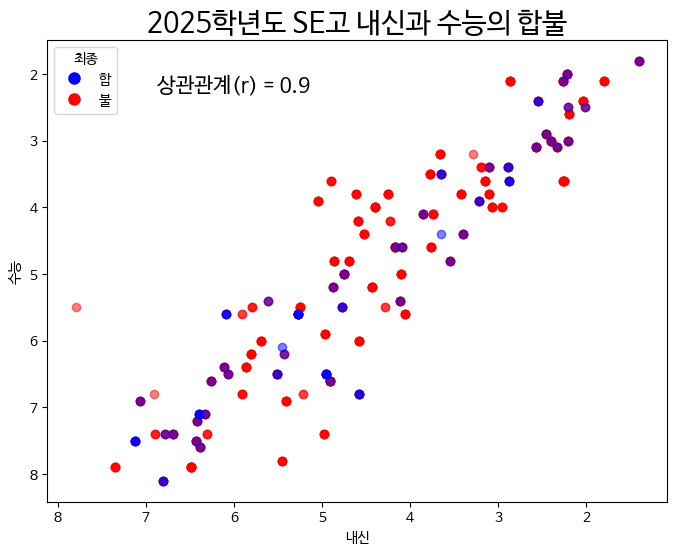

In [ ]:
#10. 합격자, 불합격자를 다른 색깔로 보여주기: legend를 합, 불 순서로 바꾸기

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.lines as mlines



# 전처리: 공백 및 특수문자 제거 강화
df['최종'] = df['최종'].astype(str).str.strip().str.replace('\xa0', '', regex=False).str.replace(r'\s+', '', regex=True)

# 결측치 제거
df = df.dropna(subset=['전과목', '등급수능', '최종'])
df['등급수능'] = pd.to_numeric(df['등급수능'], errors='coerce')
df = df.dropna(subset=['전과목', '등급수능', '최종'])

color_map = {'합': 'blue', '불': 'red'}

plt.figure(figsize=(8, 6))

unique_labels = df['최종'].unique()

for label in unique_labels:
    subset = df[df['최종'] == label]
    plt.scatter(subset['전과목'], subset['등급수능'],
                alpha=0.5, c=color_map.get(label, 'gray'), label=label)

x = df['전과목'].values
y = df['등급수능'].values
corr_coef = np.corrcoef(x, y)[0, 1]

plt.title('2025학년도 SE고 내신과 수능의 합불', fontsize = 20)
plt.xlabel('내신')
plt.ylabel('수능')
plt.text(0.3, 0.9, f'상관관계(r) = {corr_coef:.1f}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=15)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# legend 순서 고정 ('합', '불') & 점 모양으로 표시
legend_order = ['합', '불']
legend_handles = [
    mlines.Line2D([], [], color=color_map[label], marker='o', linestyle='None', markersize=8, label=label)
    for label in legend_order if label in unique_labels
]

plt.legend(handles=legend_handles, title='최종')

plt.show()

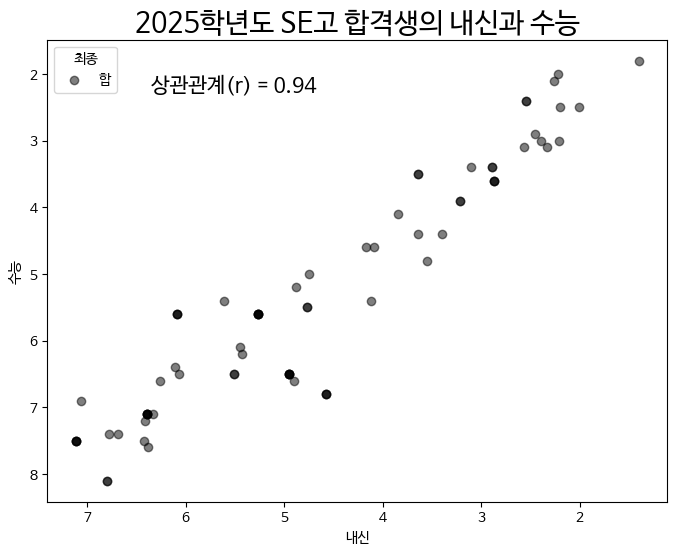

In [ ]:
#11. 합격생들의 내신과 수능

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# 전처리: 공백 및 특수문자 제거 강화
df['최종'] = df['최종'].astype(str).str.strip().str.replace('\xa0', '', regex=False).str.replace(r'\s+', '', regex=True)


# 결측치 제거 및 '등급수능' 숫자형 변환
df = df.dropna(subset=['전과목', '등급수능', '최종'])
df['등급수능'] = pd.to_numeric(df['등급수능'], errors='coerce')
df = df.dropna(subset=['전과목', '등급수능', '최종'])


# '합' 데이터만 선택
df_pass = df[df['최종'] == '합']

plt.figure(figsize=(8, 6))

plt.scatter(df_pass['전과목'], df_pass['등급수능'], alpha=0.5, c='black', label='합')

x = df_pass['전과목'].values
y = df_pass['등급수능'].values
corr_coef = np.corrcoef(x, y)[0, 1]

plt.title('2025학년도 SE고 합격생의 내신과 수능', fontsize = 20)
plt.xlabel('내신')
plt.ylabel('수능')
plt.text(0.3, 0.9, f'상관관계(r) = {corr_coef:.2f}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=15)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.legend(title='최종')


plt.show()


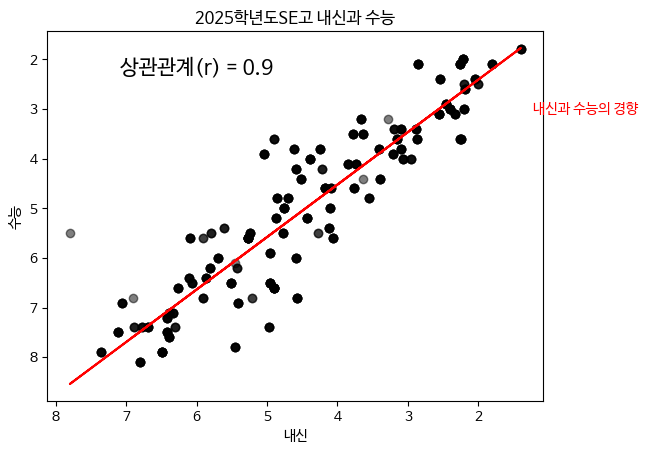

In [ ]:
#12. 내신과 수능과 상관관계: 산포도에 추세선(회귀선) 표시


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Drop rows with any NaN values in '전과목' or '등급수능' columns
df = df.dropna(subset=['전과목', '등급수능'])

# Extract '전과목' and '등급수능' columns
x = df['전과목'].values
y = df['등급수능'].values

# Calculate the correlation coefficient
corr_coef = np.corrcoef(x, y)[0, 1]

# Create the scatter plot
plt.scatter(x, y, alpha=0.5, c='black')
plt.title('2025학년도SE고 내신과 수능')
plt.xlabel('내신')
plt.ylabel('수능')

# Add the correlation coefficient to the plot
plt.text(0.3, 0.9, f'상관관계(r) = {corr_coef:.1f}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=15)

# Reverse the x-axis and y-axis
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Calculate linear regression line
m, b = np.polyfit(x, y, 1)
# Add linear regression line to scatter plot
plt.plot(x, m*x + b, color='red')


# Add text for the regression line
plt.text(np.median(x)- 3.3, m*np.median(x) + b - 2, '내신과 수능의 경향', color='red')


# 저장 경로 설정
path1 = '/content/drive/MyDrive/python/sehyun/result_png/'
path2 = '/content/drive/MyDrive/python/sehyun/result_pdf/'

# 그래프 저장
plt.savefig(f'{path1}pass_2025_세현고_내신수능산포도_회귀선.png')
plt.savefig(f'{path2}pass_2025_세현고_내신수능산포도_회귀선.pdf')

plt.show()

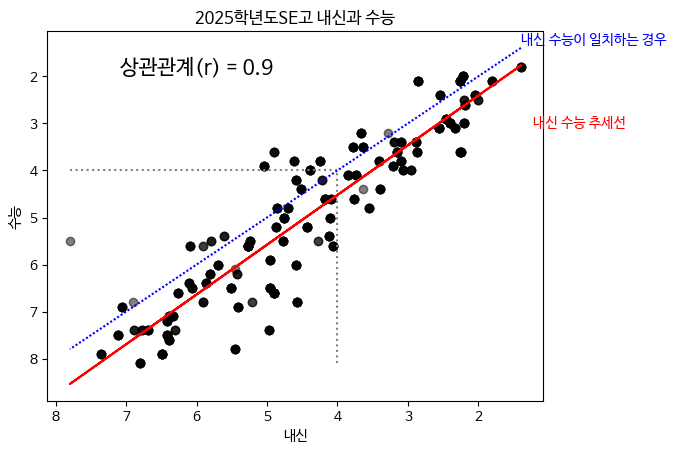

In [18]:
# 기존 코드 유지
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = df.dropna(subset=['전과목', '등급수능'])
x = df['전과목'].values
y = df['등급수능'].values

corr_coef = np.corrcoef(x, y)[0, 1]

plt.scatter(x, y, alpha=0.5, c='black')
plt.title('2025학년도SE고 내신과 수능')
plt.xlabel('내신')
plt.ylabel('수능')

plt.text(0.3, 0.9, f'상관관계(r) = {corr_coef:.1f}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=15)


# ✅ 조건 추가: 점선 (x=4에서 수직선, y=4에서 수평선)
# x축→ (x_min, 4)에서 (4, 4)까지 수평선
plt.plot([max(x), 4], [4, 4], linestyle='dotted', color='gray')

# y축→ (4, y_min)에서 (4, 4)까지 수직선
plt.plot([4, 4], [max(y), 4], linestyle='dotted', color='gray')



#축 역방향
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')
plt.text(np.median(x)- 3.3, m*np.median(x) + b - 2, '내신 수능 추세선', color='red')

plt.plot([min(x), max(x)], [min(x), max(x)], color='blue', linestyle='--', dashes=[1, 1])
plt.text(min(x), min(x), '내신 수능이 일치하는 경우', color='blue', verticalalignment='bottom')



# 그래프 저장
path1 = '/content/drive/MyDrive/python/sehyun/result_png/'
path2 = '/content/drive/MyDrive/python/sehyun/result_pdf/'

#plt.savefig(f'{path1}pass_2025_세현고_내신수능산포도_회귀선_일대일대응선.png')
#plt.savefig(f'{path2}pass_2025_세현고_내신수능산포도_회귀선_일대일대응선.pdf')
plt.show()


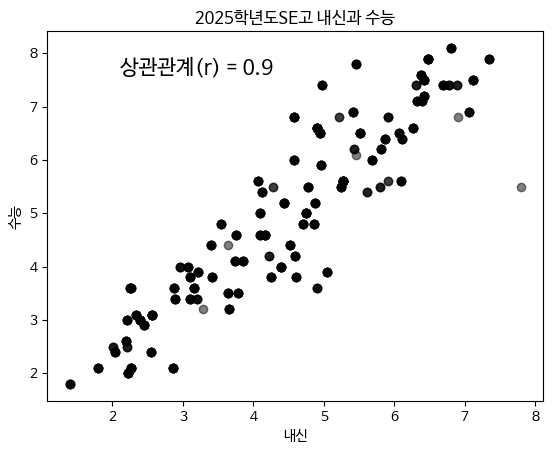

In [ ]:
#14. 내신과 수능과 상관관계: 역방향 산포도

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Drop rows with any NaN values in '전과목' or '등급수능' columns
df = df.dropna(subset=['전과목', '등급수능'])


# Extract '전과목' and '등급수능' columns
x = df['전과목'].values
y = df['등급수능'].values


# Calculate the correlation coefficient
corr_coef = np.corrcoef(x, y)[0, 1]


# Create the scatter plot
plt.scatter(x, y, alpha=0.5,  c='black')
plt.title('2025학년도SE고 내신과 수능')
plt.xlabel('내신')
plt.ylabel('수능')

# Add the correlation coefficient to the plot
plt.text(0.3, 0.9, f'상관관계(r) = {corr_coef:.1f}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=15)

# Reverse the x-axis and y-axis
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()


#그래프 저장
path = '/content/drive/MyDrive/python/sehyun/result_habbul/'
plt.savefig(f'{path}pass_2025_세현고_내신수능상관계수_reverse.png')
plt.savefig(f'{path}pass_2025_세현고_내신수능상관계수__reverse.pdf')

plt.show()

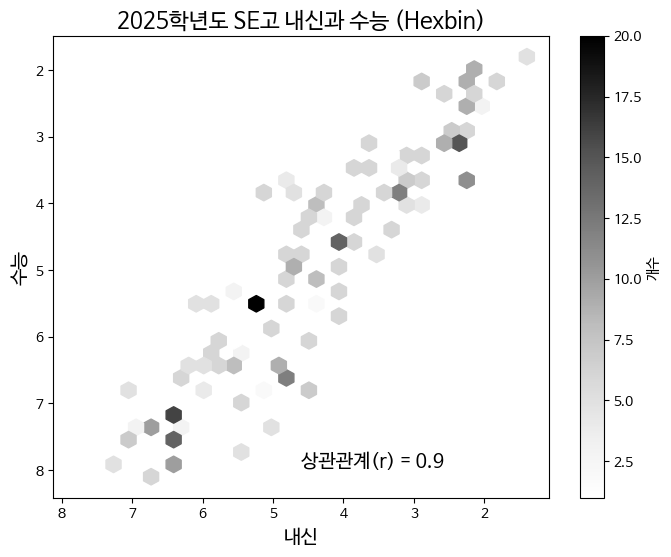

In [ ]:
#15. 내신과 수능의 육각모양 산점도: (hexbin)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# '전과목'과 '등급수능'에 NaN이 있는 행 제거
df = df.dropna(subset=['전과목', '등급수능'])

# '전과목'과 '등급수능' 데이터 추출
x = df['전과목'].values
y = df['등급수능'].values

# 상관계수 계산
corr_coef = np.corrcoef(x, y)[0, 1]

# hexbin 그래프 그리기
plt.figure(figsize=(8, 6))
hb = plt.hexbin(x, y, gridsize=30, cmap='Greys', mincnt=1)  # mincnt=1: 빈 칸 안 나오게
plt.colorbar(hb, label='개수')  # 색깔에 대응하는 데이터 수 표시
plt.title('2025학년도 SE고 내신과 수능 (Hexbin)', fontsize=16)
plt.xlabel('내신', fontsize=14)
plt.ylabel('수능', fontsize=14)

# 상관계수 추가
plt.text(0.5, 0.1, f'상관관계(r) = {corr_coef:.1f}',
         ha='left', va='top',
         transform=plt.gca().transAxes, fontsize=14)

# x축과 y축 뒤집기
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# 그래프 저장 경로 설정
path = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'
# 저장하려면 주석 해제
# plt.savefig(f'{path}pass_2025_은평고_내신수능_hexbin.png')
# plt.sav


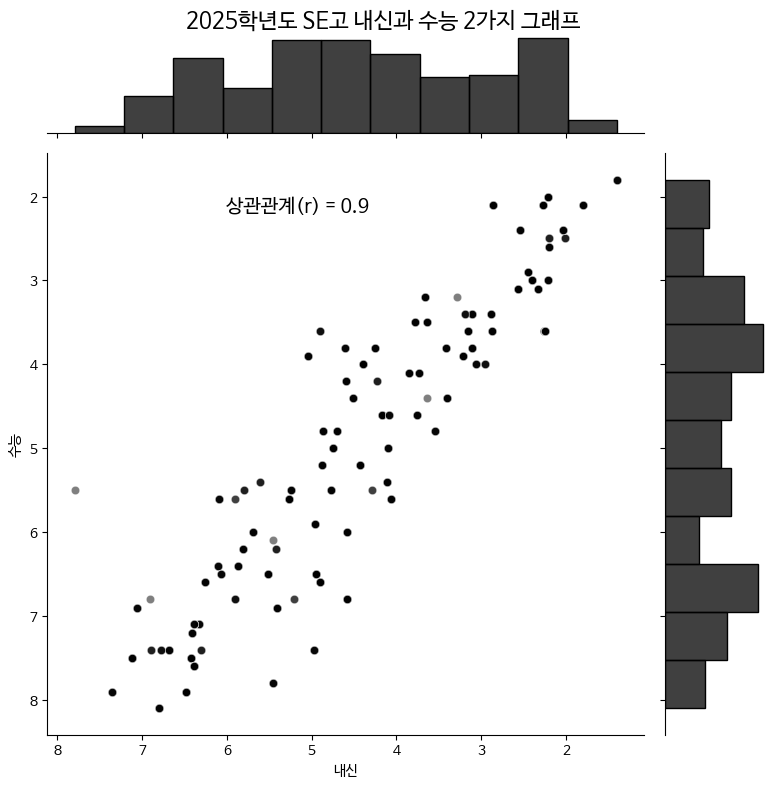

In [ ]:
#16. 산점도 + 막대그래프

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 데이터 전처리
df = df.dropna(subset=['전과목', '등급수능'])
x = df['전과목'].values
y = df['등급수능'].values
corr_coef = np.corrcoef(x, y)[0, 1]

# jointplot: 산점도 + 주변 히스토그램
g = sns.jointplot(
    data=df,
    x='전과목',
    y='등급수능',
    kind='scatter',
    color='black',
    height=8,
    alpha=0.5
)

# 상관계수 텍스트 추가
g.ax_joint.text(
    0.3, 0.9,
    f'상관관계(r) = {corr_coef:.1f}',
    transform=g.ax_joint.transAxes,
    fontsize=14
)

# 축 반전
g.ax_joint.invert_xaxis()
g.ax_joint.invert_yaxis()

# 라벨 및 제목
g.set_axis_labels('내신', '수능')
plt.suptitle('2025학년도 SE고 내신과 수능 2가지 그래프', fontsize=16)
plt.subplots_adjust(top=0.95)  # 제목 위치 조정

plt.show()

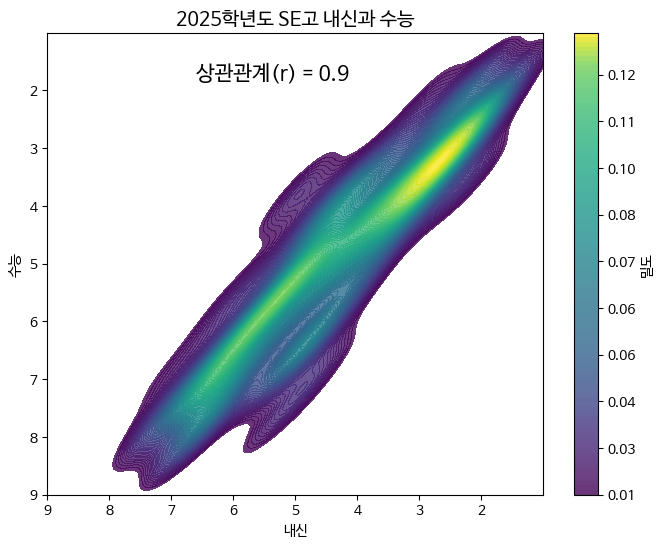

In [ ]:
#17 내신과 수능의 밀집도(kernel density estimation: KDE)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter, MaxNLocator


# 데이터 전처리
df = df.dropna(subset=['전과목', '등급수능'])
x = df['전과목'].values
y = df['등급수능'].values
corr_coef = np.corrcoef(x, y)[0, 1]

# 커널 밀도 플롯
plt.figure(figsize=(8, 6))
kde = sns.kdeplot(
    x=x, y=y, fill=True, cmap="viridis", thresh=0.05, levels=100, alpha=0.8
)

# 컬러바 추가 (숫자 포맷 소수점 둘째자리로 설정)
mappable = kde.get_children()[0]
cbar = plt.colorbar(mappable)
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))
cbar.set_label("밀도")

# 제목, 상관계수 텍스트
plt.title('2025학년도 SE고 내신과 수능', fontsize=14)
plt.xlabel('내신')
plt.ylabel('수능')
plt.text(0.3, 0.9, f'상관관계(r) = {corr_coef:.1f}', transform=plt.gca().transAxes, fontsize=15)


#축 범위를 1에서 9까지 설정하고 1단위로 표시
plt.xlim(1, 9)  # x축 범위 설정
plt.ylim(1, 9)  # y축 범위 설정


# 축 반전
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()


# x축과 y축의 단위를 1에서 9까지 1단위로 표시
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='lower',  min_n_ticks= 8))  # x축 범위 설정
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower',  min_n_ticks= 8))  # y축 범위 설정


plt.show()

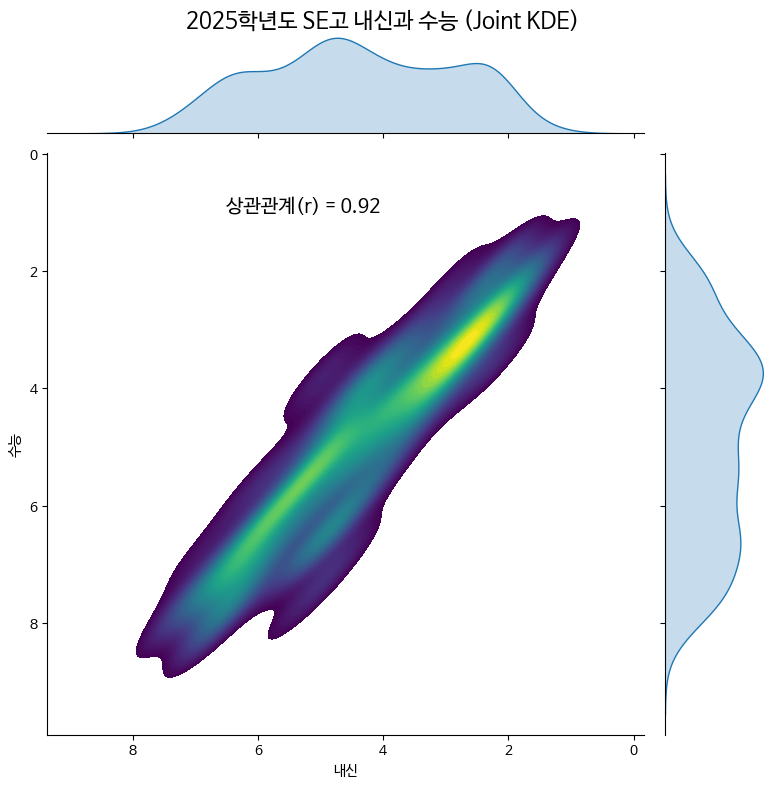

In [ ]:
#18. 내신과 수능의 산점도 및 정규분포 곡선

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 데이터 전처리
df = df.dropna(subset=['전과목', '등급수능'])
x = df['전과목'].values
y = df['등급수능'].values
corr_coef = np.corrcoef(x, y)[0, 1]

# jointplot 생성
g = sns.jointplot(
    data=df,
    x='전과목',
    y='등급수능',
    kind='kde',
    fill=True,
    cmap='viridis',
    thresh=0.05,
    levels=100,
    height=8
)

# 상관계수 텍스트 추가
g.ax_joint.text(
    0.3, 0.9,
    f'상관관계(r) = {corr_coef:.2f}',
    transform=g.ax_joint.transAxes,
    fontsize=14
)

# 축 반전 (jointplot에서는 개별 축 접근 필요)
g.ax_joint.invert_xaxis()
g.ax_joint.invert_yaxis()

# 라벨 및 제목 수동 설정
g.set_axis_labels('내신', '수능')
plt.suptitle('2025학년도 SE고 내신과 수능 (Joint KDE)', fontsize=16)
plt.subplots_adjust(top=0.95)  # 제목 위치 조정

plt.show()

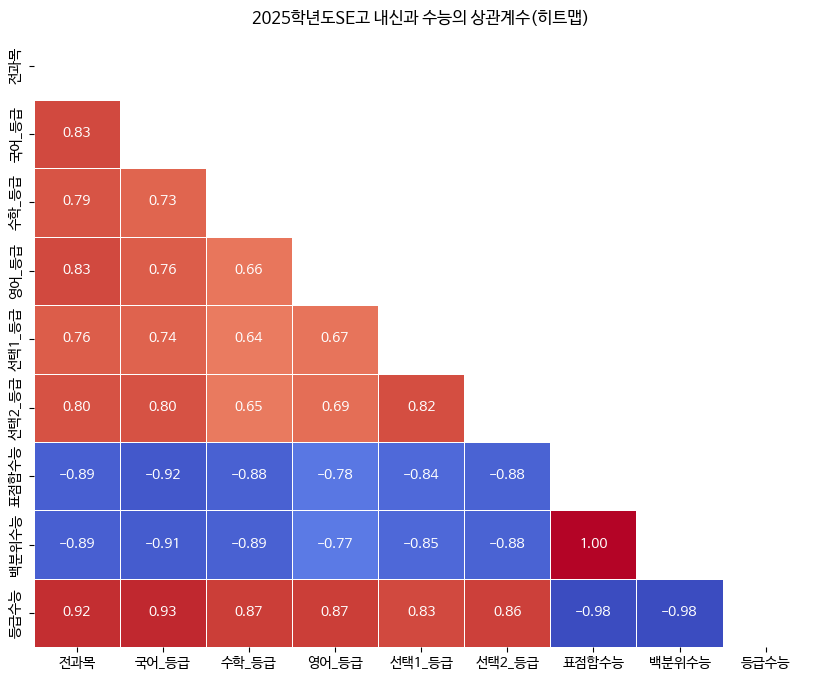

In [ ]:
#19. 내신과 수능과 상관관계(히트맵)


import seaborn as sns

#일부 항목추출
df_heatmap = df[['전과목', '국어_등급', '수학_등급', '영어_등급', '선택1_등급', '선택2_등급', '표점합수능',  '백분위수능',  '등급수능']]


# 상관계수 계산
corr = df_heatmap.corr()



# 대각행렬 오른쪽 부분을 마스킹 (대각선을 포함한 오른쪽 상단 부분을 제외)
mask = np.triu(np.ones_like(corr, dtype=bool))


# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask, cbar=False)
plt.title('2025학년도SE고 내신과 수능의 상관계수(히트맵)')

path = '/content/drive/MyDrive/python/sehyun/result_habbul/'
#plt.savefig(f'{path}pass_2025_세현고_히트맵상관계수.png')
#plt.savefig(f'{path}pass_2025_세현고_히트맵상관계수.pdf')

plt.show()

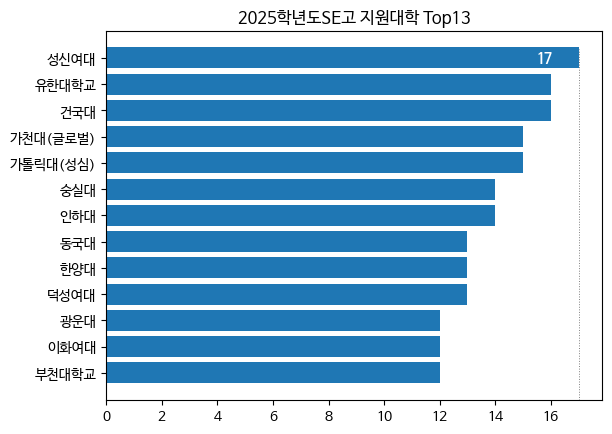

In [20]:
#20. 지원대학 막대그래프

import pandas as pd
import matplotlib.pyplot as plt


# 데이터 불러오기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}sehyun_2025_habbul.xlsx')

# Filter the rows based on the frequency of the "대학" column
freq = df['대학'].value_counts()
freq = freq[freq >= 12]

# 대학수
freq_num = len(freq)

# Create a horizontal bar plot with descending order
freq_sorted = freq.sort_values()
plt.barh(freq_sorted.index, freq_sorted)



# Draw a dotted vertical line only from the X-axis tick with maximum value of the plot
max_value = max(freq_sorted)
plt.axvline(max_value, linestyle=':', color='gray', linewidth=0.7, ymax=0.95)  # 아래쪽 x축까지 선이 도달하도록 ymax 설정



# Annotate the maximum value on the plot
plt.text(max_value - 1.5, len(freq_sorted) - 1, f'{max_value}', color='white', fontsize=10, va='center', fontweight='bold')



# Save the plot in png and pdf formats
path1 = '/content/drive/MyDrive/python/sehyun/result_habbul/'

plt.title(f"2025학년도SE고 지원대학 Top{freq_num}")
#plt.savefig(f'{path1}2025uni_preferred.png', dpi=300, bbox_inches='tight')
#plt.savefig(f'{path1}2025uni_preferred.pdf', bbox_inches='tight')
plt.show()

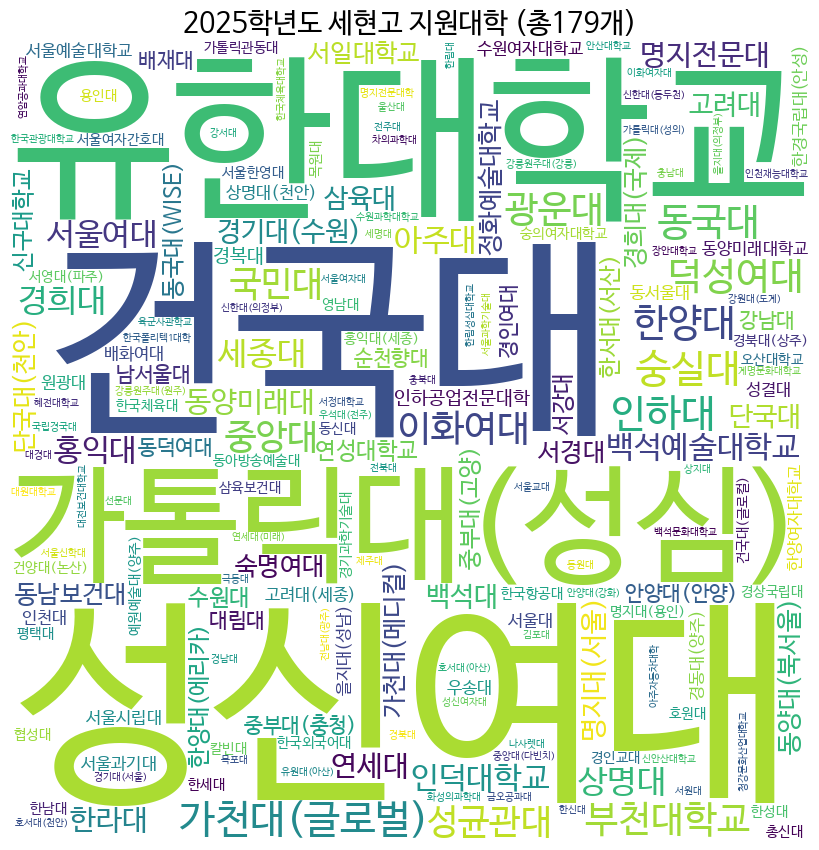

In [28]:
#21.지원대학 워드클라우드(wordcloud)

import random
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datetime

# Get the current year
current_year = datetime.datetime.now().year


# Assuming the academic year starts this year and continues into the next year
academic_year = f"{current_year}학년도"


#지원시기: 수시
#df_apply = df[df.지원시기  == '수시']



#중복제외한 대학수
df_dup = df.drop_duplicates('대학')
df_freq = len(df_dup['대학'])



#결과를 하나로 고정
random.seed(42)  # set the random seed



wordcloud = WordCloud(font_path='NanumBarunGothic', width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(df['대학'].value_counts())


fig = plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)


# Now update the title string to include the current academic year
plt.title(f"{academic_year} 세현고 지원대학 (총{df_freq}개)", fontsize=20)

path = '/content/drive/MyDrive/python/sehyun/result_wordcloud/'
pdf_path = f'{path}2025학년도_세현고_wordcloud.pdf'
plt.savefig(pdf_path, dpi=300, bbox_inches='tight', pad_inches=0)

wordcloud.to_file(f'{path}2025학년도_세현고_wordcloud.png')

plt.show()

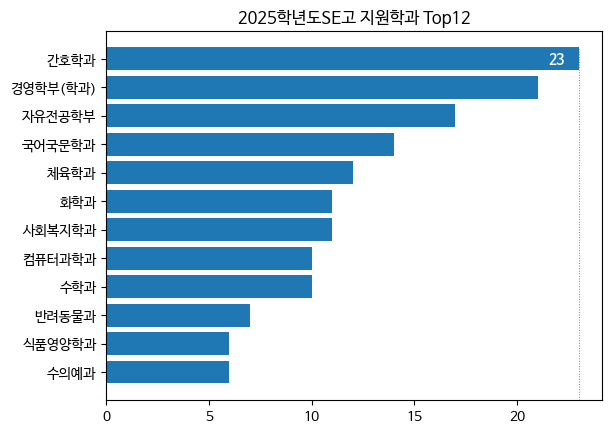

In [ ]:
#22. 지원학과 가로 막대그래프

import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}sehyun_2025_habbul.xlsx')


# '모집단위' 열에서 '경영학과'와 '경영학부'를 '경영학부(학과)'로 합산
df['모집단위'] = df['모집단위'].replace({'경영학과': '경영학부(학과)', '경영학부': '경영학부(학과)'})

# '모집단위' 열에서 '컴퓨터관련학과' 합산
df['모집단위'] = df['모집단위'].replace({'컴퓨터소프트웨어학과': '컴퓨터과학과', '소프트웨어학과': '컴퓨터과학과',  '컴퓨터공학과': '컴퓨터과학과'})


# '모집단위' 열에서 '국어교육문학' 합산
df['모집단위'] = df['모집단위'].replace({'국어국문문예창작학부': '국어교육문학전공', '국어교육과': '국어교육문학전공'})


# '모집단위' 열에서 '사회복지학과' 합산
df['모집단위'] = df['모집단위'].replace({'사회복지과': '사회복지학과'})


# '모집단위' 열에서 '물리치료과' 합산
df['모집단위'] = df['모집단위'].replace({'물리치료과': '물리치료학과'})



# '모집단위' 열에서 '컴퓨터관련학과' 합산
df['모집단위'] = df['모집단위'].replace({'자유전공': '자유전공학부', '자율설계전공학부': '자유전공학부'})


# '모집단위' 열에서 '컴퓨터관련학과' 합산
df['모집단위'] = df['모집단위'].replace({'체육교육과': '체육학과'})

# Filter the rows based on the frequency of the "대학" column
freq = df['모집단위'].value_counts()
freq = freq[freq >= 6]

# 대학수
freq_num = len(freq)

# Create a horizontal bar plot with descending order
freq_sorted = freq.sort_values()
plt.barh(freq_sorted.index, freq_sorted)



# Draw a dotted vertical line only from the X-axis tick with maximum value of the plot
max_value = max(freq_sorted)
plt.axvline(max_value, linestyle=':', color='gray', linewidth=0.7, ymax=0.95)  # 아래쪽 x축까지 선이 도달하도록 ymax 설정



# Annotate the maximum value on the plot
plt.text(max_value - 1.5, len(freq_sorted) - 1, f'{max_value}', color='white', fontsize=10, va='center', fontweight='bold')



# Save the plot in png and pdf formats
path1 = '/content/drive/MyDrive/python/sehyun/result_habbul/'

plt.title(f"2025학년도SE고 지원학과 Top{freq_num}")
plt.savefig(f'{path1}2025haggwa_preferred.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{path1}2025haggwa_preferred.pdf', bbox_inches='tight')
plt.show()

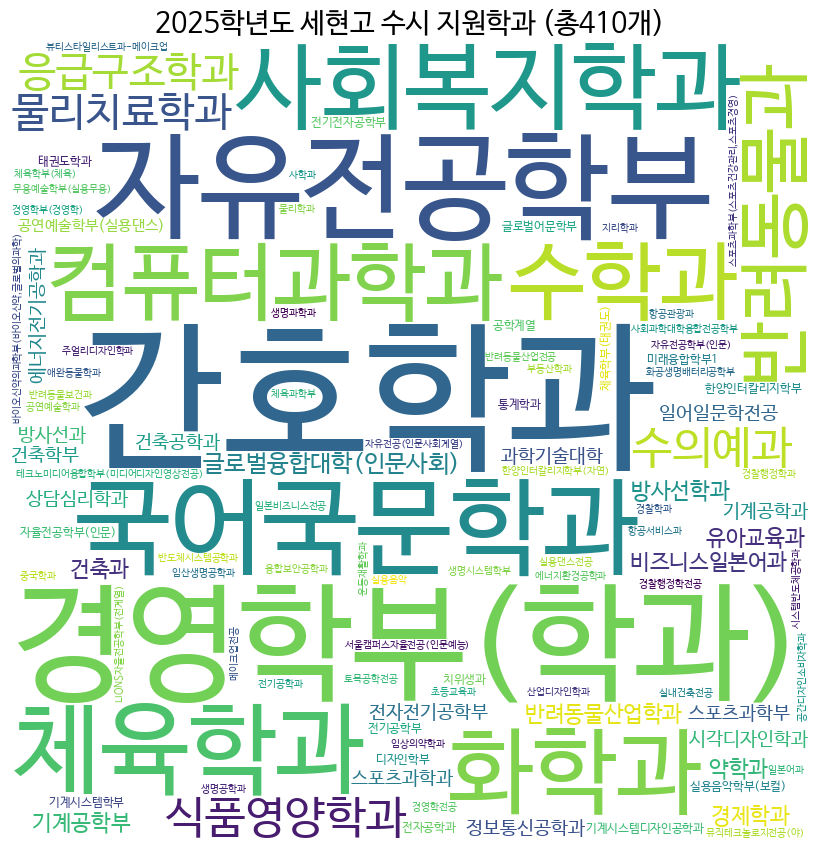

In [27]:
#23. 지원학과 워드클라우드(wordcloud)

import random
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datetime

# Get the current year
current_year = datetime.datetime.now().year


# Assuming the academic year starts this year and continues into the next year
academic_year = f"{current_year}학년도"


# '모집단위' 열에서 '경영학과'와 '경영학부'를 '경영학부(학과)'로 합산
df['모집단위'] = df['모집단위'].replace({'경영학과': '경영학부(학과)', '경영학부': '경영학부(학과)'})



# '모집단위' 열에서 '컴퓨터관련학과' 합산
df['모집단위'] = df['모집단위'].replace({'컴퓨터소프트웨어학과': '컴퓨터과학과', '소프트웨어학과': '컴퓨터과학과',  '컴퓨터공학과': '컴퓨터과학과'})



# '모집단위' 열에서 '국어교육문학' 합산
df['모집단위'] = df['모집단위'].replace({'국어국문문예창작학부': '국어교육문학전공', '국어교육과': '국어교육문학전공'})


# '모집단위' 열에서 '사회복지학과' 합산
df['모집단위'] = df['모집단위'].replace({'사회복지과': '사회복지학과'})


# '모집단위' 열에서 '물리치료과' 합산
df['모집단위'] = df['모집단위'].replace({'물리치료과': '물리치료학과'})



# '모집단위' 열에서 '컴퓨터관련학과' 합산
df['모집단위'] = df['모집단위'].replace({'자유전공': '자유전공학부', '자율설계전공학부': '자유전공학부'})



# '모집단위' 열에서 '컴퓨터관련학과' 합산
df['모집단위'] = df['모집단위'].replace({'체육교육과': '체육학과'})

#지원시기: 수시
#df_apply = df[df.지원시기  == '수시']


#중복제외한 대학수
df_dup = df.drop_duplicates('모집단위')
df_freq = len(df_dup['모집단위'])



#결과를 하나로 고정
random.seed(42)  # set the random seed



wordcloud = WordCloud(font_path='NanumBarunGothic', width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(df['모집단위'].value_counts())


fig = plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)


# Now update the title string to include the current academic year
plt.title(f"{academic_year} 세현고 수시 지원학과 (총{df_freq}개)", fontsize=20)

path = '/content/drive/MyDrive/python/sehyun/result_wordcloud/'
pdf_path = f'{path}2025학년도_세현고_wordcloud.pdf'
#plt.savefig(pdf_path, dpi=300, bbox_inches='tight', pad_inches=0)

wordcloud.to_file(f'{path}2025학년도_세현고_지원학과wordcloud.png')

plt.show()

몇등급 이상:2
몇등급 미만:3


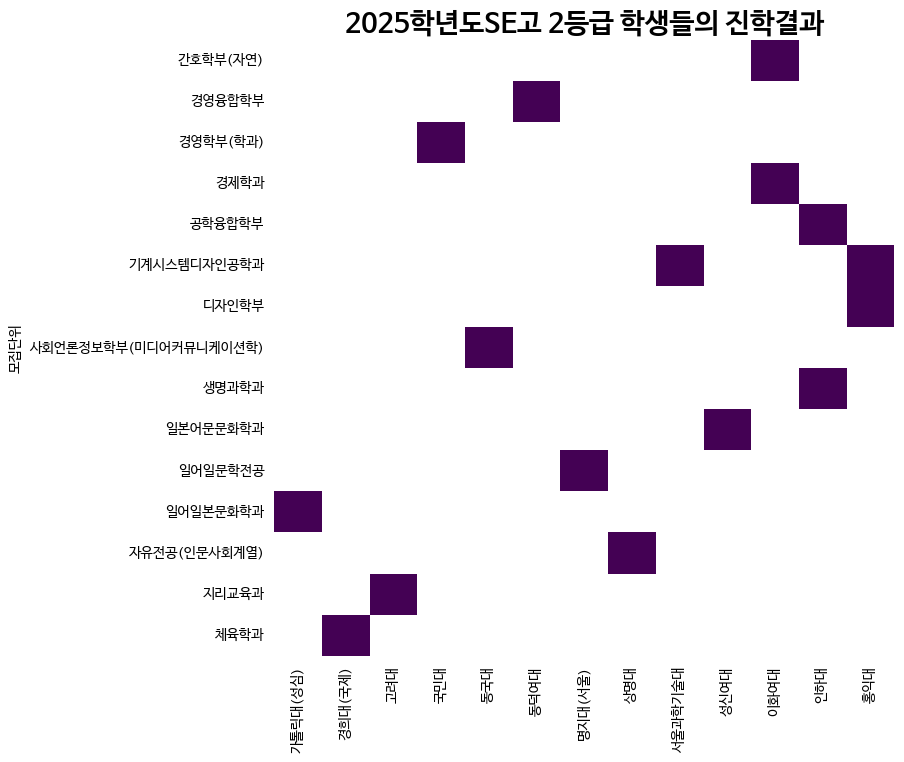

In [ ]:
#24. 특정등급대 학생들의 진학학과 그래프

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd


lownum = float(input("몇등급 이상:"))
highnum = float(input("몇등급 미만:"))


# 필터링 조건에 맞는 데이터 추출
df_one = df[(df['전과목'] >= lownum) & (df['전과목'] < highnum) & (df['최종'] == '합')].copy()

plt.figure(figsize=(8, 8))
plt.title(f'2025학년도SE고 {int(round(lownum))}등급 학생들의 진학결과',fontsize = 20, fontweight='bold')  # 제목 설정


# 그룹화 및 모집단위별 카운트, 실제 데이터에 맞춰서 df_one을 사용
df_2dhist = pd.DataFrame({
    x_label: grp['모집단위'].value_counts()
    for x_label, grp in df_one.groupby('대학')
})

# 히트맵 생성
#ax = sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt=".2f")
ax = sns.heatmap(df_2dhist, cmap='viridis', cbar=False)


# 히트맵 상단에 '내신등급' 텍스트 추가
# 'x'와 'y'는 텍스트가 위치할 좌표입니다. 'ha'는 가로 정렬 방식을, 'va'는 세로 정렬 방식을 지정합니다.
#plt.text(x=1.12, y=1.02, s='내신등급', fontsize=12, ha='center', va='bottom', transform=ax.transAxes)


plt.tick_params(axis='both',  # 'both'는 x축과 y축 모두에 적용됩니다.
                which='both',  # 'both'는 주요(major) 및 부차적(minor) tick 모두에 적용됩니다.
                bottom=False,  # x축의 하단 tick을 삭제합니다.
                top=False,    # x축의 상단 tick을 삭제합니다.
                left=False,   # y축의 왼쪽 tick을 삭제합니다.
                right=False,  # y축의 오른쪽 tick을 삭제합니다.
                labelbottom=True,  # x축 라벨은 유지합니다.
                labelleft=True)  # y축 라벨 유지



In [ ]:
#25. 학교 수능 백분위평균

# '학번' 열에서 '380'이 들어있지 않은 행 추출: 재수생들 제외
df_filtered = df[~df['학번'].astype(str).str.contains('380')]


df_standard = df_filtered.dropna(subset = ['백분위수능'])


s_mean = df_standard['백분위수능'].mean().round(0)
print(f"2025학년도SE고 수능 백분위점수는 {int(s_mean)}%입니다.")  # 소수점 첫째 자리에서 반올림

2025학년도SE고 수능 백분위점수는 46%입니다.


수능의 이론적 평균
1. 백분위 : 50%
2. 표준점수: 300점 - 국어(100) + 수학(100) + 탐구1(50) + 탐구2(50)
3. 수능등급: 5등급 - 9등급 중 중간값(median)

In [ ]:
# 특수대학 합격자 명단

sp = ['경찰대', '육군사관학교', '해군사관학교', '공군사관학교', '국군간호사관학교', '광주과학기술원', '대구경북과학기술원', '울산과학기술대학교', '한국과학기술원', '한국예술종합학교']


print("***2025학년도 수시 특수대 합격자 명단***\n")
for u in range(len(sp)):
    df_특수대 = df[(df.대학 == sp[u]) & (df.최종 == '합')]
    df_특수대 = df_특수대[['학번', '대학', '모집단위', '전형분류', '최종', '전과목', '백분위수능' ]]
    print("%s 대학 합격자" % sp[u])
    #print("{} 대학 합격자는 {}명" .format(sp[u] len(df_특수대)))
    print(df_특수대)
    print("--------------------------------------")


print("\n-----------------------------------------")
print("***2025학년도 수시 특수대 합격자수***\n")

# 특수대 합격자수
sp = ['경찰대', '육군사관학교', '해군사관학교', '공군사관학교', '국군간호사관학교', '광주과학기술원', '대구경북과학기술원', '울산과학기술대학교', '한국과학기술원', '한국예술종합학교']

for u in range(len(sp)):
    df_특수대 = df[(df.대학 == sp[u]) & (df.최종 == '합')]
    df_특수대 = df_특수대[['학번', '대학', '모집단위', '전형분류', '최종']]
print("2025학년도 특수대 수시합격자수는 %d명입니다." % len(df_특수대))


In [ ]:
[columns for columns in df.columns if '전형' in columns]

['전형명', '전형종류', '전형일자', '전형분류', '전형방법']

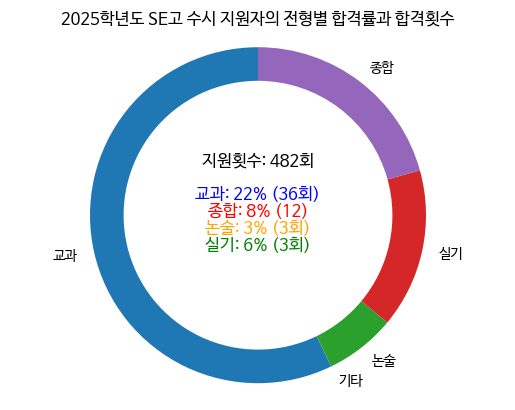

In [ ]:
#52. 전형별 합격률과 합격횟수

import pandas as pd
import matplotlib.pyplot as plt

# 조건에 따라 데이터 필터링
filtered_df = df[df['지원시기'] == '수시']

# 각 전형분류별 합격자 수 계산
pass_counts = filtered_df.groupby('전형분류')['최종'].value_counts().unstack().fillna(0)['합']

# 각 전형분류별 합격률 계산
pass_rates = filtered_df.groupby('전형분류')['최종'].value_counts(normalize=True).unstack().fillna(0)['합']

# 도넛 차트 생성
labels = pass_rates.index
sizes = pass_rates.values * 100
fig, ax = plt.subplots()
#ax.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=90, wedgeprops=dict(width=0.2))
ax.pie(sizes, labels=labels, startangle=90, wedgeprops=dict(width=0.2))

ax.axis('equal')

# 도넛 차트 내부에 비율과 빈도 표현
ax.text(0, 0.3, f"지원횟수: {len(filtered_df)}회", ha='center', fontsize=12, color='black')
ax.text(0, 0.1, f"교과: {pass_rates['교과'] * 100:.0f}% ({int(pass_counts['교과'])}회)", ha='center', fontsize=12, color='blue')
ax.text(0, 0, f"종합: {pass_rates['종합'] * 100:.0f}% ({int(pass_counts['종합'])})", ha='center', fontsize=12, color='red')
ax.text(0, -0.1, f"논술: {pass_rates['논술'] * 100:.0f}% ({int(pass_counts['논술'])}회)", ha='center', fontsize=12, color='orange')
ax.text(0, -0.2, f"실기: {pass_rates['실기'] * 100:.0f}% ({int(pass_counts['실기'])}회)", ha='center', fontsize=12, color='green')



plt.title('2025학년도 SE고 수시 지원자의 전형별 합격률과 합격횟수')
plt.show()

In [ ]:
#56-1. 등급대별 수시 지원조합: 익명처리

import pandas as pd
from tabulate import tabulate

##  데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}sehyun_2025_habbul.xlsx')

# 입력 받기
level_min = float(input("높은 등급:"))
level_max = float(input("낮은 등급:"))

# '수능'을 제외한 값 필터링
df_filtered = df[df['전형분류'] != '수능']

# 범위에 따른 '전과목' 값 필터링
df_level = df_filtered[(df_filtered['전과목'] >= level_min) & (df_filtered['전과목'] < level_max)].copy()

# 전과목 내신 소수점 첫째자리까지 표시
df_level['전과목'] = df_level['전과목'].round(1)

# 이름을 첫 글자만 남기고 나머지는 별표로 처리한 새로운 열 추가
df_level['익명'] = df_level['이름'].apply(lambda x: x[0] + '*' * (len(x) - 1))


# '전형분류'의 빈도수를 카운트하여 피벗 테이블 생성
pivot_table = df_level.pivot_table(index=('이름', '전과목', '익명'), columns='전형분류', aggfunc='size', fill_value=0)


# '익명', '전과목', '교과', '종합', '실기', '논술' 열로 정렬
result = pivot_table.reset_index().reindex(columns=['익명', '전과목', '교과', '종합', '실기', '논술'], fill_value=0)

# '전과목' 열의 값의 오름차순으로 정렬
result = result.sort_values(by='전과목').reset_index(drop=True)

# 교과, 종합, 실기, 논술의 평균 계산
averages = result[['교과', '종합', '실기', '논술']].mean().round(1)
average_row = pd.DataFrame([['평균', '', averages['교과'], averages['종합'], averages['실기'], averages['논술']]],
                           columns=result.columns)

# 결과에 평균 행 추가
result = pd.concat([result, average_row], ignore_index=True)

# '지원총횟수' 열 추가 및 값 계산
result['지원총횟수'] = result[['교과', '종합', '실기', '논술']].sum(axis=1)

# 결과 출력
print(tabulate(result, headers='keys', tablefmt='plain'))

# 데이터 프레임으로 전환
result_df = pd.DataFrame(result)

# 결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/sehyun/result_habbul/'
result_df.to_excel(excel_writer=f'{path}{level_min}등급대_수시전형_지원조합_2025_세현고_익명.xlsx', index=False)

높은 등급:1
낮은 등급:3
    익명    전과목      교과    종합    실기    논술    지원총횟수
 0  이**    1.4          1         1     0       0             2
 1  김**    1.8          1         5     0       0             6
 2  정**    2.0          2         1     0       0             3
 3  임**    2.0          2         4     0       0             6
 4  이**    2.2          5         0     0       1             6
 5  최**    2.2          0         2     1       0             3
 6  이**    2.2          2         3     0       1             6
 7  한**    2.2          1         1     0       4             6
 8  박**    2.2          2         4     0       0             6
 9  한**    2.3          3         3     0       0             6
10  신**    2.3          2         1     0       1             4
11  이**    2.3          0         5     1       0             6
12  조**    2.4          1         5     0       0             6
13  이**    2.5          0         6     0       0             6
14  조**    2.5          1         5    

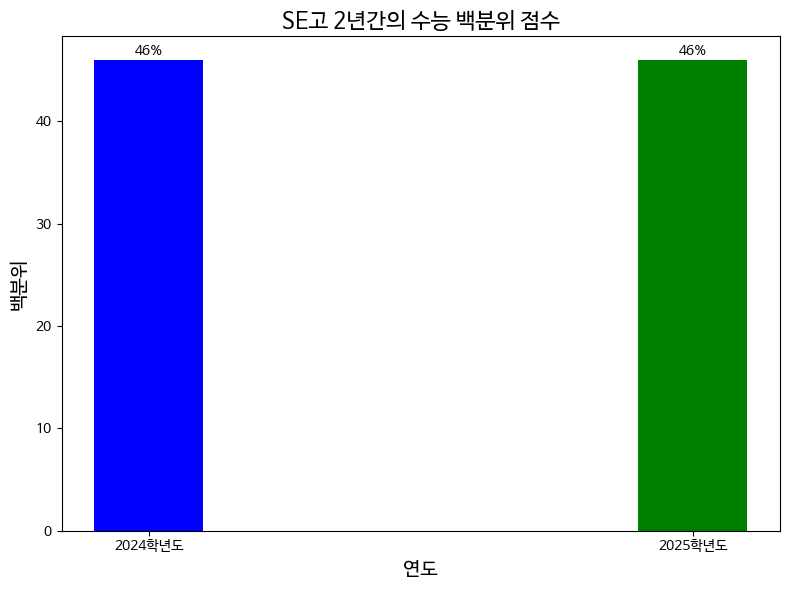

In [ ]:
#해당 학교 2개년 백분위점수

import matplotlib.pyplot as plt

# '학번' 열에서 '380'이 들어있지 않은 행 추출: 재수생들 제외
df_filtered = df[~df['학번'].astype(str).str.contains('380')]


# 필터링된 행에서 백분위수능 열의 결측값을 제외하고 평균 계산하여 반올림한 후 정수로 변환
current_mean = round(df_filtered['백분위수능'].dropna().mean())

# 2023년도 백분위와 2025년도 백분위 데이터
years = ['2024학년도', '2025학년도']
percentiles = [46, current_mean]

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(years, percentiles, color=['blue', 'green'], width=0.2)

# 그래프 제목과 축 레이블 설정
plt.title('SE고 2년간의 수능 백분위 점수', fontsize=16)
plt.xlabel('연도', fontsize=14)
plt.ylabel('백분위', fontsize=14)

# 그래프에 백분위 값 표시
for i in range(len(years)):
    plt.text(x=years[i], y=percentiles[i] + 0.5, s=f"{percentiles[i]}%", ha='center')

# 화살표 추가
plt.annotate('', xy=(0.8, 49), xytext=(0.2, 43), arrowprops=dict(facecolor='black', arrowstyle='->'))

path = '/content/drive/MyDrive/python/sehyun/result_habbul/'
plt.savefig(f'{path}pass_2025_세현고_2년치수능백분위.png')
plt.savefig(f'{path}pass_2025_세현고_2년치수능백분위.pdf')

# 그래프 출력
plt.tight_layout()
plt.show()

In [ ]:
#56-2. 등급대별 수시 지원조합: 익명

import pandas as pd
from tabulate import tabulate

##  데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}sehyun_2025_habbul.xlsx')

# 입력 받기
level_min = float(input("높은 등급:"))
level_max = float(input("낮은 등급:"))

# '수능'을 제외한 값 필터링
df_filtered = df[df['전형분류'] != '수능']

# 범위에 따른 '전과목' 값 필터링
df_level = df_filtered[(df_filtered['전과목'] >= level_min) & (df_filtered['전과목'] < level_max)].copy()

# 전과목 내신 소수점 첫째자리까지 표시
df_level['전과목'] = df_level['전과목'].round(1)


# 이름을 첫 글자만 남기고 나머지는 별표로 처리한 새로운 열 추가
df_level['익명'] = df_level['이름'].apply(lambda x: x[0] + '*' * (len(x) - 1))


# '전형분류'의 빈도수를 카운트하여 피벗 테이블 생성
pivot_table = df_level.pivot_table(index=('익명', '전과목'), columns='전형분류', aggfunc='size', fill_value=0)


# '익명', '전과목', '교과', '종합', '실기', '논술' 열로 정렬
result = pivot_table.reset_index().reindex(columns=['익명', '전과목', '교과', '종합', '실기', '논술'], fill_value=0)

# '전과목' 열의 값의 오름차순으로 정렬
result = result.sort_values(by='전과목').reset_index(drop=True)

# 교과, 종합, 실기, 논술의 평균 계산
averages = result[['교과', '종합', '실기', '논술']].mean().round(1)
average_row = pd.DataFrame([['평균', '', averages['교과'], averages['종합'], averages['실기'], averages['논술']]],
                           columns=result.columns)

# 결과에 평균 행 추가
result = pd.concat([result, average_row], ignore_index=True)

# '지원총횟수' 열 추가 및 값 계산
result['지원총횟수'] = result[['교과', '종합', '실기', '논술']].sum(axis=1)

# 결과 출력
print(tabulate(result, headers='keys', tablefmt='plain'))

# 데이터 프레임으로 전환
result_df = pd.DataFrame(result)

# 결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/sehyun/result_habbul/'
result_df.to_excel(excel_writer=f'{path}{level_min}등급{level_max}사이_수시전형_지원조합_2025_세현고_익명.xlsx', index=False)

높은 등급:1
낮은 등급:2
    익명    전과목      교과    종합    실기    논술    지원총횟수
 0  김**    1.1          4       2         0       0             6
 1  정**    1.6          4       2         0       0             6
 2  윤**    1.7          6       0         0       0             6
 3  염**    1.8          4       2         0       0             6
 4  조**    1.8          4       2         0       0             6
 5  평균                 4.4     1.6       0       0             6
